# Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reprocesing Dataset

### Membaca file sebagai teks biasa


In [5]:
with open('zoo_data.csv', 'r') as f:
    lines = f.readlines()

### Memproses setiap baris


In [7]:
data = []
for line in lines:
    cleaned_line = line.strip().split(',')
    data.append(cleaned_line)

### Membuat DataFrame dari list yang telah diproses


In [9]:
df = pd.DataFrame(data)

### Daftar semua atribut unik yang mungkin ada


In [11]:
all_attributes = {
    'hair', 'milk', 'eggs', 'feathers', 'airborne', 'aquatic', 'predator',
    'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail', 'domestic',
    'catsize', 'four legs', 'two legs', 'six legs', 'eight legs', 'five legs',
    'one', 'two', 'three', 'four', 'five', 'six', 'seven'
}

### Fungsi untuk memproses setiap baris


In [13]:
def process_row(row):
    row_values = row.values
    animal_name = row_values[0]
    attributes = list(row_values[1:])
    type_value = None
    
    # Mencari nilai type (angka di akhir)
    type_candidates = {'one', 'two', 'three', 'four', 'five', 'six', 'seven'}
    
    # Iterasi dari belakang
    for i in range(len(attributes)-1, -1, -1):
        if attributes[i] in type_candidates:
            type_value = attributes[i]
            # Buat attributes baru tanpa type_value
            attributes = [attr for j, attr in enumerate(attributes) if j != i]
            break
    
    # Membuat dictionary hasil
    result = {'animal_name': animal_name}
    
    # Menandai atribut yang ada
    for attr in all_attributes:
        result[attr] = attr in attributes
    
    # Menambahkan type jika ditemukan
    if type_value:
        result['type'] = type_value
    
    return pd.Series(result)

### Memproses dataframe


In [15]:
processed_df = df.apply(process_row, axis=1)

### Kolom yang ingin dipertahankan


In [17]:
columns_to_keep = [
    'animal_name', 'hair', 'milk', 'eggs', 'feathers', 'airborne', 'aquatic',
    'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'tail',
    'domestic', 'catsize', 'four legs', 'two legs', 'six legs', 'eight legs',
    'five legs', 'type'
]

### Memilih kolom yang diinginkan


In [19]:
final_df = processed_df[columns_to_keep]
final_df.to_csv('processed_zoo_data.csv', index=False)

### Menampilkan 5 baris pertama

In [21]:
print(final_df.head())

  animal_name   hair   milk   eggs  feathers  airborne  aquatic  predator  \
0    aardvark   True   True  False     False     False    False      True   
1    antelope   True   True  False     False     False    False     False   
2        bass  False  False   True     False     False     True      True   
3        bear   True   True  False     False     False    False      True   
4        boar   True   True  False     False     False    False      True   

   toothed  backbone  ...   fins   tail  domestic  catsize  four legs  \
0     True      True  ...  False  False     False     True       True   
1     True      True  ...  False   True     False     True       True   
2     True      True  ...   True   True     False    False      False   
3     True      True  ...  False  False     False     True       True   
4     True      True  ...  False   True     False     True       True   

   two legs  six legs  eight legs  five legs  type  
0     False     False       False      False 

# Analisis dan Cleanshing Data

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    bool  
 2   milk         101 non-null    bool  
 3   eggs         101 non-null    bool  
 4   feathers     101 non-null    bool  
 5   airborne     101 non-null    bool  
 6   aquatic      101 non-null    bool  
 7   predator     101 non-null    bool  
 8   toothed      101 non-null    bool  
 9   backbone     101 non-null    bool  
 10  breathes     101 non-null    bool  
 11  venomous     101 non-null    bool  
 12  fins         101 non-null    bool  
 13  tail         101 non-null    bool  
 14  domestic     101 non-null    bool  
 15  catsize      101 non-null    bool  
 16  four legs    101 non-null    bool  
 17  two legs     101 non-null    bool  
 18  six legs     101 non-null    bool  
 19  eight legs   101 non-null    

### Mengubah Tipe data kolom type menjadi numerik

In [25]:
# Membuat mapping manual untuk kolom type
type_mapping = {
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7
}

# Mengaplikasikan mapping ke kolom type
final_df['type_numeric'] = final_df['type'].map(type_mapping)

# Konversi kolom boolean ke integer (0/1) untuk semua fitur
bool_columns = ['hair', 'milk', 'eggs', 'feathers', 'airborne', 'aquatic', 
               'predator', 'toothed', 'backbone', 'breathes', 'venomous', 
               'fins', 'tail', 'domestic', 'catsize', 'four legs', 
               'two legs', 'six legs', 'eight legs', 'five legs']

for col in bool_columns:
    final_df[col] = final_df[col].astype(int)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21840\3026429263.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['type_numeric'] = final_df['type'].map(type_mapping)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21840\3026429263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[col] = final_df[col].astype(int)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_21840\3026429263.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [26]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   animal_name   101 non-null    object
 1   hair          101 non-null    int32 
 2   milk          101 non-null    int32 
 3   eggs          101 non-null    int32 
 4   feathers      101 non-null    int32 
 5   airborne      101 non-null    int32 
 6   aquatic       101 non-null    int32 
 7   predator      101 non-null    int32 
 8   toothed       101 non-null    int32 
 9   backbone      101 non-null    int32 
 10  breathes      101 non-null    int32 
 11  venomous      101 non-null    int32 
 12  fins          101 non-null    int32 
 13  tail          101 non-null    int32 
 14  domestic      101 non-null    int32 
 15  catsize       101 non-null    int32 
 16  four legs     101 non-null    int32 
 17  two legs      101 non-null    int32 
 18  six legs      101 non-null    int32 
 19  eight le

In [27]:
final_df.head()

,animal_name,hair,milk,eggs,feathers,airborne,aquatic,predator,toothed,backbone,...,tail,domestic,catsize,four legs,two legs,six legs,eight legs,five legs,type,type_numeric
0,aardvark,1,1,0,0,0,0,1,1,1,...,0,0,1,1,0,0,0,0,one,1
1,antelope,1,1,0,0,0,0,0,1,1,...,1,0,1,1,0,0,0,0,one,1
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,0,0,0,0,0,0,four,4
3,bear,1,1,0,0,0,0,1,1,1,...,0,0,1,1,0,0,0,0,one,1
4,boar,1,1,0,0,0,0,1,1,1,...,1,0,1,1,0,0,0,0,one,1


### Membuat dataframe baru untuk pemodelan (df_model) dengan kolom yang diperlukan

In [44]:
df_model = final_df[[
    'hair', 'milk', 'eggs', 'feathers', 'airborne', 'aquatic', 
    'predator', 'toothed', 'backbone', 'breathes', 'venomous',
    'fins', 'tail', 'domestic', 'catsize', 'four legs', 
    'two legs', 'six legs', 'eight legs', 'five legs',
    'type_numeric'
]].copy()

print(df_model.head())

   hair  milk  eggs  feathers  airborne  aquatic  predator  toothed  backbone  \
0     1     1     0         0         0        0         1        1         1   
1     1     1     0         0         0        0         0        1         1   
2     0     0     1         0         0        1         1        1         1   
3     1     1     0         0         0        0         1        1         1   
4     1     1     0         0         0        0         1        1         1   

   breathes  ...  fins  tail  domestic  catsize  four legs  two legs  \
0         1  ...     0     0         0        1          1         0   
1         1  ...     0     1         0        1          1         0   
2         0  ...     1     1         0        0          0         0   
3         1  ...     0     0         0        1          1         0   
4         1  ...     0     1         0        1          1         0   

   six legs  eight legs  five legs  type_numeric  
0         0           0      

### Pengecekan Terakhir

In [49]:
df_model.isnull().sum()

hair            0
milk            0
eggs            0
feathers        0
airborne        0
aquatic         0
predator        0
toothed         0
backbone        0
breathes        0
venomous        0
fins            0
tail            0
domestic        0
catsize         0
four legs       0
two legs        0
six legs        0
eight legs      0
five legs       0
type_numeric    0
dtype: int64

In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   hair          101 non-null    int32
 1   milk          101 non-null    int32
 2   eggs          101 non-null    int32
 3   feathers      101 non-null    int32
 4   airborne      101 non-null    int32
 5   aquatic       101 non-null    int32
 6   predator      101 non-null    int32
 7   toothed       101 non-null    int32
 8   backbone      101 non-null    int32
 9   breathes      101 non-null    int32
 10  venomous      101 non-null    int32
 11  fins          101 non-null    int32
 12  tail          101 non-null    int32
 13  domestic      101 non-null    int32
 14  catsize       101 non-null    int32
 15  four legs     101 non-null    int32
 16  two legs      101 non-null    int32
 17  six legs      101 non-null    int32
 18  eight legs    101 non-null    int32
 19  five legs     101 non-null   

# Membuat Model

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn import tree

### Regresi

In [58]:
# Memisahkan fitur dan target
X = df_model.drop('type_numeric', axis=1)
y = df_model['type_numeric']

In [60]:
# Split data menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Model Regresi Linear
print("\n=== MODEL REGRESI LINEAR ===")
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


=== MODEL REGRESI LINEAR ===


LinearRegression()

In [64]:
# Prediksi dan evaluasi
y_pred_reg = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_reg)
print(f"MSE: {mse:.4f}")
print(f"R-squared: {reg_model.score(X_test, y_test):.4f}")

MSE: 0.0909
R-squared: 0.9786


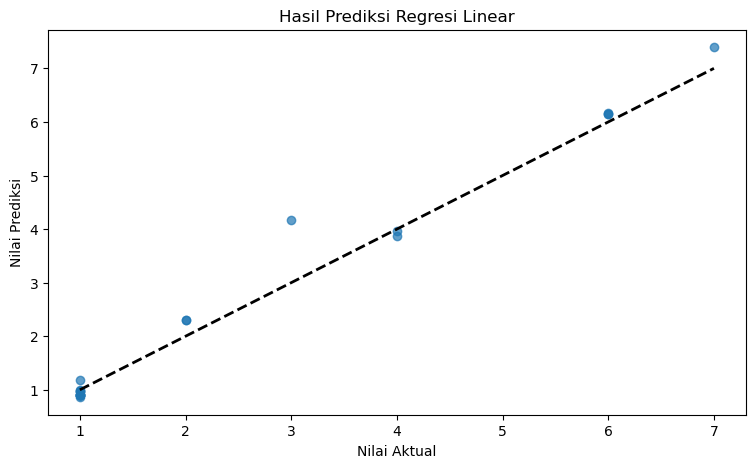

In [87]:
# Visualisasi hasil regresi
plt.figure(figsize=(9, 5))
plt.scatter(y_test, y_pred_reg, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Hasil Prediksi Regresi Linear')
plt.show()

### Decision Tree

In [69]:
# Model Decision Tree
print("\n=== MODEL DECISION TREE ===")
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)


=== MODEL DECISION TREE ===


DecisionTreeClassifier(max_depth=3, random_state=42)

In [71]:
# Prediksi dan evaluasi
y_pred_tree = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_tree)
print(f"Akurasi: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

Akurasi: 0.8095

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         3
           7       0.20      1.00      0.33         1

    accuracy                           0.81        21
   macro avg       0.53      0.67      0.56        21
weighted avg       0.77      0.81      0.78        21



C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


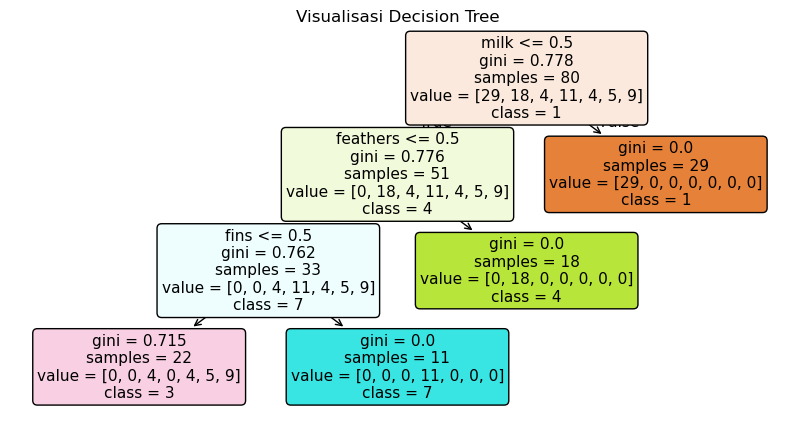

In [75]:
# Visualisasi Decision Tree 1
plt.figure(figsize=(10, 5))
tree.plot_tree(tree_model, 
               feature_names=X.columns, 
               class_names=[str(i) for i in y.unique()],
               filled=True, rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

In [85]:
# Visualisasi Decision Tree 2
from sklearn.tree import export_text

tree_rules = export_text(tree_model, 
                        feature_names=list(X.columns))
print(tree_rules)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- fins <= 0.50
|   |   |   |--- class: 7
|   |   |--- fins >  0.50
|   |   |   |--- class: 4
|   |--- feathers >  0.50
|   |   |--- class: 2
|--- milk >  0.50
|   |--- class: 1



### Feature Importance

In [77]:
print("\nFeature Importance:")
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree_model.feature_importances_
}).sort_values('Importance', ascending=False)
print(importance)


Feature Importance:
       Feature  Importance
1         milk    0.486982
3     feathers    0.310227
11        fins    0.202791
0         hair    0.000000
18  eight legs    0.000000
17    six legs    0.000000
16    two legs    0.000000
15   four legs    0.000000
14     catsize    0.000000
13    domestic    0.000000
12        tail    0.000000
10    venomous    0.000000
9     breathes    0.000000
8     backbone    0.000000
7      toothed    0.000000
6     predator    0.000000
5      aquatic    0.000000
4     airborne    0.000000
2         eggs    0.000000
19   five legs    0.000000


# Kesimpulan